In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from skimage.transform import resize
from __future__ import absolute_import
from __future__  import division
from __future__ import print_function
import os
import matplotlib.pyplot as plt

In [2]:
violence_train = np.zeros((24,30,160,160,3), dtype = np.float64)
labels_train = []

In [3]:
def capture(filename):
    print(filename)
    frames = np.zeros((30, 160, 160, 3), dtype=np.float64)
    i=0
    vc = cv2.VideoCapture(filename)
    if vc.isOpened():
        rval , frame = vc.read()
    else:
        rval = False
    #frm = cv2.resize(frame,(200,200))
    frm = resize(frame,(160, 160, 3))
    frm = np.expand_dims(frm,axis=0)
    if(np.max(frm)>1):
        frm = frm/255.0
    frames[i][:] = frm
    i +=1
    while i < 30:
        rval, frame = vc.read()
        #print(i)
        #plt.imshow(frame)
        #plt.show()
        #frm = cv2.resize(frame,(200,200))
        frm = resize(frame,(160, 160, 3))
        frm = np.expand_dims(frm,axis=0)
        if(np.max(frm)>1):
            frm = frm/255.0
        frames[i][:] = frm
        i +=1
        #print(frame)
    return frames

def cut_save(main_dir,mod):
    i = 0
    #fights = np.zeros((399, 40, 200, 200, 3), dtype=np.float)
    #noFights = np.zeros((599, 42, 200, 200, 3), dtype=np.float)
    for x in os.listdir(main_dir):
        print(x,'jhh')
        if 1==1:
            td = main_dir+x+'/'
            print(td)
            #for y in os.listdir(main_dir+x+'/'):
                #print(y)
            for file in os.listdir(td):
                fl = os.path.join(td, file)
                videos = capture(fl)
                if mod == 'train':
                    violence_train[i][:][:] = videos
                    i +=1
                    if x =='violent_train':
                        labels_train.append(1)
                    else:
                        labels_train.append(0)
                elif mod =='test':
                    violence_test[i][:][:] = videos
                    i +=1
                    if x =='violent_test':
                        labels_test.append(1)
                    else:
                        labels_test.append(0)
                elif mod =='val':
                    violence_val[i][:][:] = videos
                    i +=1
                    if x =='fights':
                        labels_val.append(1)
                    else:
                        labels_val.append(0)

In [4]:
cut_save('./train/',"train")

non-violent_train jhh
./train/non-violent_train/
./train/non-violent_train/balcony_football__birmingham_promoted_to_premier_from_balcony_town_hall__clippo67_.mp4
./train/non-violent_train/balcony_football__Seoul_vs_Dae_Gu_Futbol_Roman_Candles__JOECORE__bbpgvaM2sxs.mp4
./train/non-violent_train/Fighting003_x264-00_00_00-00_00_58.80.mp4
./train/non-violent_train/Fighting004_x264-00_01_55.40-00_02_18.50.mp4
./train/non-violent_train/Fighting004_x264-00_02_20.90-00_02_46.40.mp4
./train/non-violent_train/Fighting005_x264-00_00_00-00_00_26.60.mp4
./train/non-violent_train/Fighting006_x264-00_00_00-00_00_08.10.mp4
./train/non-violent_train/Fighting007_x264-00_00_17.60-00_00_31.10.mp4
./train/non-violent_train/Fighting007_x264-00_01_34.20-.mp4
./train/non-violent_train/Fighting008_x264-00_00_00-00_00_51.60.mp4
./train/non-violent_train/football_crowds__2008_Penn_State_Football_Crowd_Pump_Up_Video__rmcmillen50__rQB1R.mp4
./train/non-violent_train/football_crowds__Anglia_News_Sport_Soccer_Footba

In [ ]:
sum(labels_train)

12

In [ ]:
os.getcwd()

'c:\\Users\\KRISHNAKUMAR.G.M\\Desktop\\repos\\violence_detection_project\\violence_detection'

In [ ]:
os.listdir('./')

['.git', 'test', 'train', 'train.ipynb']

In [ ]:
os.listdir('./')[1:]

['test', 'train', 'train.ipynb']

In [ ]:
os.listdir("./")[1:]

['test', 'train', 'train.ipynb']

In [ ]:
violence_test= np.zeros((4, 30, 160, 160, 3), dtype=np.float64)
labels_test = []
cut_save('./test/',"test")

non-violent_test jhh
./test/non-violent_test/
violent_test jhh
./test/violent_test/


In [ ]:
labels_train

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(violence_train,labels_train, test_size=0.33, random_state=40)

In [ ]:
(y_train)

[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

In [ ]:
violence_test= np.zeros((10, 40, 160, 160, 3), dtype=np.float64)
labels_test = []
cut_save('./',"test")

.git jhh
./.git/
./.git/config


UnboundLocalError: local variable 'frame' referenced before assignment

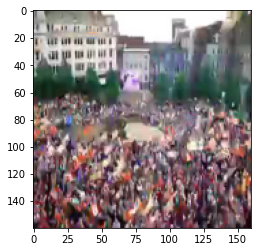

In [6]:
plt.imshow(violence_train[0][6])

In [7]:
np.random.seed(1234)
num_classes = 2
vg19 = tf.keras.applications.vgg19.VGG19
base_model = vg19(include_top=False,weights='imagenet',input_shape=(160, 160,3))
# Freeze the layers except the last 4 layers
for layer in base_model.layers:
    layer.trainable = False
# Check the trainable status of the individual layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 160, 160, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 160, 160, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 80, 80, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 80, 80, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 80, 80, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 40, 40, 128)       0     

In [8]:
layers = tf.keras.layers
models = tf.keras.models
losses = tf.keras.losses
optimizers = tf.keras.optimizers 
metrics = tf.keras.metrics
utils = tf.keras.utils
callbacks = tf.keras.callbacks
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
plot_model = tf.keras.utils.plot_model

In [9]:
num_classes = 2

cnn = models.Sequential()
cnn.add(base_model)
cnn.add(layers.Flatten())


# define LSTM model
model = models.Sequential()

model.add(layers.TimeDistributed(cnn,  input_shape=(30, 160, 160, 3)))
model.add(layers.LSTM(30 , return_sequences=True))


model.add(layers.TimeDistributed(layers.Dense(160, activation='relu')))

model.add(layers.GlobalAveragePooling1D(name="globale"))

model.add(layers.Dense(num_classes, activation="sigmoid" , name="last"))

adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# model.load_weights('violence_prediction_model.hdf5')
rms = optimizers.RMSprop()
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 30, 12800)         20024384  
 ributed)                                                        
                                                                 
 lstm (LSTM)                 (None, 30, 30)            1539720   
                                                                 
 time_distributed_1 (TimeDi  (None, 30, 160)           4960      
 stributed)                                                      
                                                                 
 globale (GlobalAveragePool  (None, 160)               0         
 ing1D)                                                          
                                                                 
 last (Dense)                (None, 2)                 322       
                                                      

In [10]:

class AccuracyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=8,min_delta=1e-5, verbose=0, mode='min')
mcp_save = callbacks.ModelCheckpoint('violence_prediction.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = callbacks.ReduceLROnPlateau(monitor='val_loss',patience=1, verbose=2,factor=0.5,min_lr=0.0000001)


In [11]:
batch_size =3
epochs = 10

In [14]:
y_train

[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]

In [12]:
y_train = utils.to_categorical(y_train)
print(y_train)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
y_test = utils.to_categorical(y_test)
print(y_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
import time

int(round(time.time()*1000))

1716382611402

In [14]:
import time
millis = int(round(time.time() * 1000))
print("started at " , millis)

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),callbacks=[earlyStopping, mcp_save, reduce_lr_loss,history])

#0.8995 4

started at  1716459579211
Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.5625

c:\Users\KRISHNAKUMAR.G.M\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 88s 14s/step - loss: 0.6866 - accuracy: 0.5625 - val_loss: 0.7641 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 2/10
6/6 [==============================] - 77s 14s/step - loss: 0.6770 - accuracy: 0.5625 - val_loss: 0.7554 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/10
6/6 [==============================] - ETA: 0s - loss: 0.6013 - accuracy: 0.6250
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
6/6 [==============================] - 81s 14s/step - loss: 0.6013 - accuracy: 0.6250 - val_loss: 0.7792 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 4/10
6/6 [==============================] - ETA: 0s - loss: 0.5460 - accuracy: 0.8125
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
6/6 [==============================] - 77s 14s/step - loss: 0.5460 - accuracy: 0.8125 - val_loss: 0.7909 - val_accuracy: 0.2500 - lr: 5.0000e-04
Epoch 5/10
6/6 [==============================] - ETA: 0s - loss: 0.4935 - accuracy: 

In [29]:
loss

[0.6865782141685486,
 0.6770469546318054,
 0.6013485193252563,
 0.5460001826286316,
 0.4935499429702759,
 0.45953723788261414,
 0.441362202167511,
 0.4341421127319336,
 0.4301377534866333,
 0.4282373785972595]

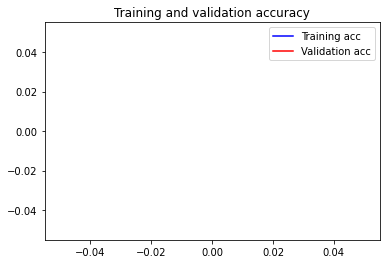

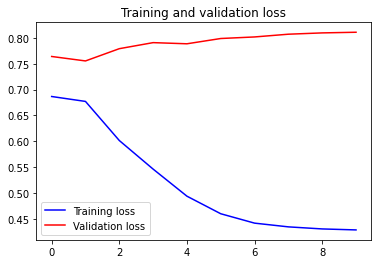

In [28]:
acc = history.acc
val_acc = history.val_acc
loss = history.loss
val_loss = history.val_loss
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()